In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_knn = pd.read_csv("df_linalol_tfidf.csv")

In [3]:
df_knn

,index,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Linalool
0,0,0.0,0.21444,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.5000
1,0,0.0,0.21444,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.5000
2,1,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0.5000
3,1,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0.5000
4,1,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42971,0.0,0.00000,0.0,0.0,0.0,0.322452,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.0625
74996,42972,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.0625
74997,42972,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.0625
74998,42975,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.0625


Splitting dependent and independent variables

In [4]:
X = df_knn.drop(['X..Linalool', 'index'], axis = 1)
y = df_knn[['X..Linalool']]

Plotting histograms on target variable

In [5]:
y_array = y.to_numpy()
y_array

array([[0.5   ],
       [0.5   ],
       [0.5   ],
       ...,
       [0.0625],
       [0.0625],
       [0.0625]])

<AxesSubplot:ylabel='Count'>

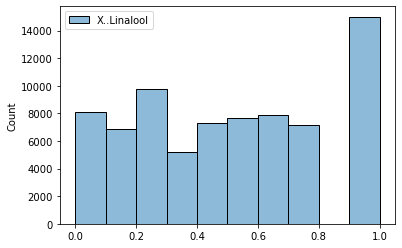

In [6]:
sns.histplot(y, bins = 10)

Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [8]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [9]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [10]:
mean_absolute_error(y_val, y_pred_knreg)

0.07146118284493284

In [11]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.8938022124587106

In [12]:
#val
r2_score(y_val, y_pred_knreg)

0.8212746598941922

Feature Selection

In [13]:
rfreg = RandomForestRegressor()

In [14]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [15]:
selector.estimator_.feature_importances_

array([4.92590174e-03, 7.91886139e-04, 1.65740998e-04, 3.04677431e-04,
       4.94429658e-04, 7.49466252e-03, 1.15501038e-03, 2.78678587e-03,
       4.62474744e-04, 4.41321397e-04, 1.57467948e-04, 2.07981668e-03,
       8.47402233e-05, 2.88594511e-04, 2.57286719e-04, 2.80595037e-03,
       5.04429946e-04, 6.47891952e-04, 5.96945247e-05, 2.99537514e-04,
       4.84116603e-03, 5.84111435e-04, 5.91682110e-04, 3.21309492e-04,
       1.19032825e-03, 1.57660563e-04, 9.59709979e-04, 6.13052935e-04,
       2.46900784e-04, 2.21632311e-03, 2.69962233e-03, 4.55572640e-04,
       6.86635528e-04, 9.46278397e-05, 1.14261684e-03, 1.12980409e-04,
       9.50755308e-04, 2.28800061e-03, 1.16652475e-04, 8.22937062e-04,
       1.92090942e-04, 7.99559507e-04, 1.66731992e-03, 4.17784820e-03,
       2.11353501e-04, 1.79352299e-03, 1.00502967e-03, 1.41191169e-04,
       8.01150129e-04, 4.16096719e-04, 1.18782757e-04, 4.84334696e-04,
       2.30519507e-04, 3.99610591e-04, 1.27273099e-03, 5.74047023e-04,
      

In [16]:
selector.threshold_

0.0021321961620469083

In [17]:
mask = selector.get_support()

In [18]:
mask

array([ True, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,

In [19]:
selected_features = X.columns[mask]

In [20]:
selected_X = df_knn[selected_features]
selected_X

,tfidf_0,tfidf_5,tfidf_7,tfidf_15,tfidf_20,tfidf_29,tfidf_30,tfidf_37,tfidf_43,tfidf_70,...,coffee,diesel,earthy,honey,lemon,orange,pine,pineapple,pungent,sweet
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.14162,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.14162,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.0,0.322452,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
74996,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
74997,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
74998,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
selected_X.columns.to_list()

['tfidf_0',
 'tfidf_5',
 'tfidf_7',
 'tfidf_15',
 'tfidf_20',
 'tfidf_29',
 'tfidf_30',
 'tfidf_37',
 'tfidf_43',
 'tfidf_70',
 'tfidf_73',
 'tfidf_78',
 'tfidf_90',
 'tfidf_91',
 'tfidf_93',
 'tfidf_101',
 'tfidf_105',
 'tfidf_111',
 'tfidf_121',
 'tfidf_137',
 'tfidf_141',
 'tfidf_145',
 'tfidf_149',
 'tfidf_154',
 'tfidf_163',
 'tfidf_166',
 'tfidf_168',
 'tfidf_173',
 'tfidf_189',
 'tfidf_190',
 'tfidf_199',
 'tfidf_207',
 'tfidf_210',
 'tfidf_230',
 'tfidf_235',
 'tfidf_239',
 'tfidf_240',
 'tfidf_245',
 'tfidf_247',
 'tfidf_253',
 'tfidf_263',
 'tfidf_265',
 'tfidf_276',
 'tfidf_277',
 'tfidf_283',
 'tfidf_285',
 'tfidf_291',
 'tfidf_303',
 'tfidf_309',
 'tfidf_312',
 'tfidf_313',
 'tfidf_329',
 'tfidf_334',
 'tfidf_335',
 'tfidf_337',
 'tfidf_344',
 'tfidf_345',
 'tfidf_348',
 'tfidf_357',
 'tfidf_373',
 'tfidf_376',
 'tfidf_382',
 'tfidf_385',
 'hybrid',
 'creative',
 'dry mouth',
 'energetic',
 'euphoric',
 'giggly',
 'happy',
 'hungry',
 'relaxed',
 'sleepy',
 'tingly',
 'upl

In [22]:
import joblib

joblib.dump(selected_X, "selected_X_knn_tfidf_linalol.pkl")
joblib.dump(selector, "selector_knn_tfidf_linalol.pkl")

['selector_knn_tfidf_linalol.pkl']

Train test split (after Feature Selection)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [24]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [25]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [26]:
mean_absolute_error(y_val, y_pred_knreg)

0.06794753726597476

In [27]:
mean_squared_error(y_val, y_pred_knreg)

0.01506626106078252

In [28]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.12274469870744936

In [29]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.9054612469179927

In [30]:
#val
r2_score(y_val, y_pred_knreg)

0.8494803323427111

Hyperparameter Tuning

In [31]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [32]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [33]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [34]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 11}

kNN (after hyperparameter tuning)

In [35]:
knreg_ht = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [36]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.0346502966680334

In [37]:
mean_squared_error(y_val, y_pred_knreg_ht)

0.009187469470277798

In [38]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.09585128830786678

In [39]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9811913368195722

In [40]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.9082124725106897

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [41]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [42]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_tfidf_linalol.pkl")
joblib.dump(y_test, "y_test_knreg_tfidf_linalol.pkl")

['y_test_knreg_tfidf_linalol.pkl']

In [43]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.03414984273519838

In [44]:
r2_score(y_test, y_pred_knreg_test)

0.90586902555827

In [45]:
mean_squared_error(y_test, y_pred_knreg_test)

0.00946943756946035

In [46]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.09731103518851472

In [47]:
y_test

,X..Linalool
11591,0.406250
52020,0.271635
34666,0.687500
22169,0.906250
23049,0.906250
...,...
60863,0.359375
32316,0.687500
60933,0.359375
43206,1.000000


In [48]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

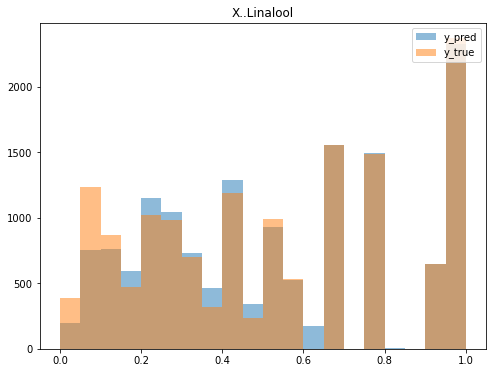

<Figure size 432x288 with 0 Axes>

In [49]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Linalool"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_tfidf_linalol.png')

Pearson R

In [50]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.953
P-value: 0.000


<AxesSubplot:>

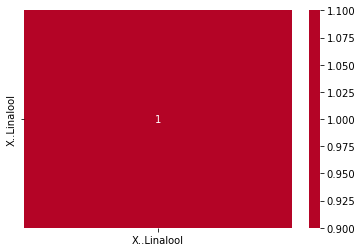

In [51]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)